In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/preprocessed_data.csv')

In [ ]:
df_new= df[df['month'].isin([1,2,3,4,5,6])]

In [ ]:
df_new.shape

(860347, 7)

In [ ]:
df_new.head(2)

,time_category_encoded,month,day,PULocationID,DOLocationID,trip_distance,total_amount
0,1,1,1,238,151,0.7,8.5
1,1,1,1,79,263,4.1,18.3


In [ ]:
df_new.drop('time_category_encoded', axis=1, inplace=True)

/tmp/ipython-input-3933126427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('time_category_encoded', axis=1, inplace=True)


In [ ]:
df_new.head()

,month,day,PULocationID,DOLocationID,trip_distance,total_amount
0,1,1,238,151,0.7,8.50
1,1,1,79,263,4.1,18.30
2,1,1,107,229,1.7,11.80
3,1,1,142,238,1.8,12.95
4,1,1,140,262,1.0,7.82


In [ ]:
df_new.isnull().sum()

,0
month,0
day,0
PULocationID,0
DOLocationID,0
trip_distance,0
total_amount,0


In [ ]:
y=df_new['total_amount']
x=df_new.drop(columns=['total_amount'])

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,random_state=7)

In [ ]:
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 645260, number of used features: 5
[LightGBM] [Info] Start training from score 18.372839


LGBMRegressor(random_state=42)

In [ ]:
# Predict & evaluate
y_pred = lgb_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

MAE:  2.3254
MSE:  16.2860
RMSE: 4.0356
R²:   0.9106


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define parameter grid
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05],
   # 'n_estimators': [100, 200],
     'n_estimators': [100, 200],
    'max_depth': [-1, 10],
    'min_child_samples': [20, 30]
}

In [ ]:
# Initialize the model
lgb_model = lgb.LGBMClassifier()  # Or LGBMRegressor() for regression

In [39]:
# Grid search
grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(random_state=42), param_grid=param_grid, cv=5, verbose=1,
                           scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 516208, number of used features: 5
[LightGBM] [Info] Start training from score 18.391484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 743
[LightGBM] [Info] Number of data points in the train set: 516208, number of used features: 5
[LightGBM] [Info] Start training from score 18.365511
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 5

In [40]:
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 15.80
R² Score: 0.91


In [42]:
#Predictions
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

In [43]:

# Overfitting / Underfitting Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Testing R² Score :", r2_score(y_test, y_test_pred))
print("Training MSE     :", mean_squared_error(y_train, y_train_pred))
print("Testing MSE      :", mean_squared_error(y_test, y_test_pred))

Best Parameters: {'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 50}
Training R² Score: 0.9137692427256658
Testing R² Score : 0.9133003705619092
Training MSE     : 15.813202141632862
Testing MSE      : 15.796926334183768


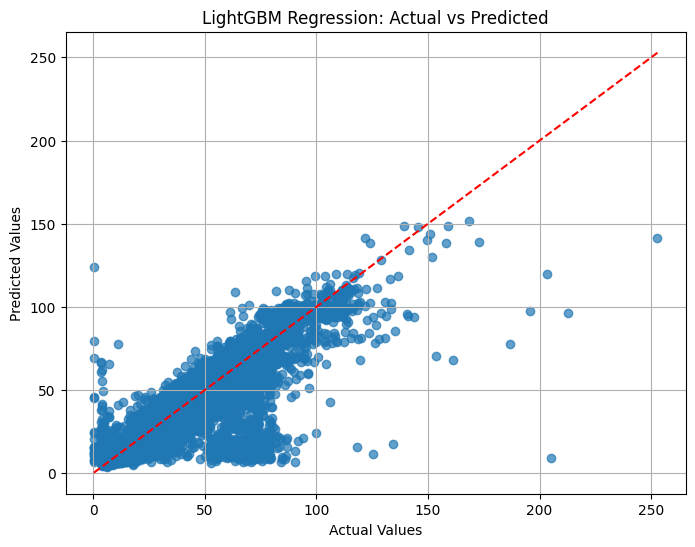

In [44]:
# Scatter Plot - Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("LightGBM Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [45]:
import joblib
joblib.dump(best_model, 'lightboost_model.pkl')

['lightboost_model.pkl']